# 線形回帰

Yoshinobu Ishizaki
2020/03/16

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
theme_set(theme_grey(base_size = 18))
options(repr.plot.width = 11, repr.plot.height = 11/16*9)

## 概要

Rによる線形回帰の例。

得られたデータを線形回帰することで、変数と観測値の間の関係式を見出し、予測計算をできるようにする。

Rに予め読み込まれている車のスピードと停止距離との測定データを使う。

In [3]:
head(cars)

,speed,dist
,<dbl>,<dbl>
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16
6,9,10


単位系をkm/h, mにした列を作成する。

In [4]:
cars$kmh <- 1.60934 * cars$speed

In [5]:
cars$dm <- 0.3048 * cars$dist

In [6]:
cars %>% head

,speed,dist,kmh,dm
,<dbl>,<dbl>,<dbl>,<dbl>
1,4,2,6.43736,0.6096
2,4,10,6.43736,3.0480
3,7,4,11.26538,1.2192
4,7,22,11.26538,6.7056
5,8,16,12.87472,4.8768
6,9,10,14.48406,3.0480


データをプロットして分布を確認する。

In [7]:
g1 <- ggplot(cars, aes(x = kmh, y = dm)) + 
    geom_point() + ggtitle("スピード[km/h]と停止距離[m]")

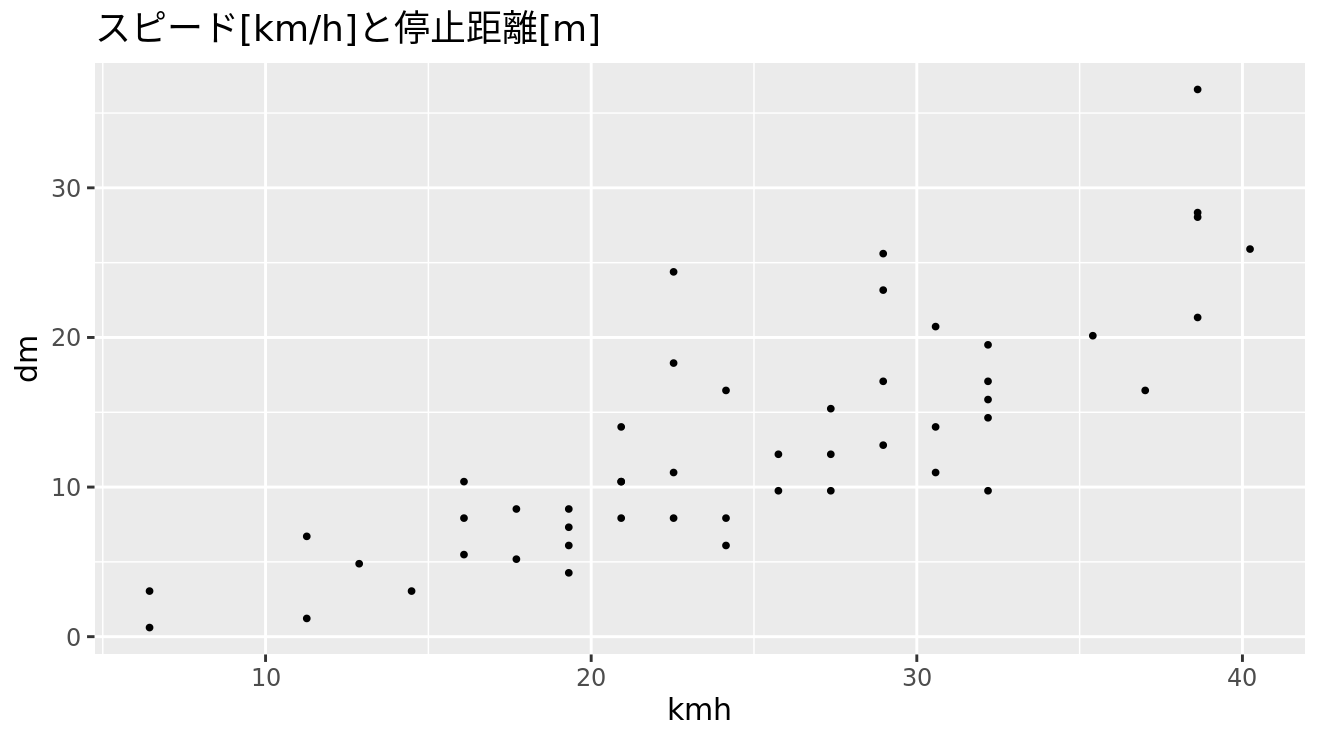

In [8]:
g1

概ね線形になっているようなので、線形回帰式を求める。

In [9]:
lm1 <- lm(dm ~ kmh, data = cars)

In [10]:
summary(lm1)


Call:
lm(formula = dm ~ kmh, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8603 -2.9033 -0.6925  2.8086 13.1678 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -5.3581     2.0600  -2.601   0.0123 *  
kmh           0.7448     0.0787   9.464 1.49e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.688 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


次のようにしてフィット関数の係数を取り出すことができる。

In [11]:
coef(lm1)

(Intercept)         kmh 
 -5.3581081   0.7447762

ggplotはもとから線形フィットを表示する機能がある。

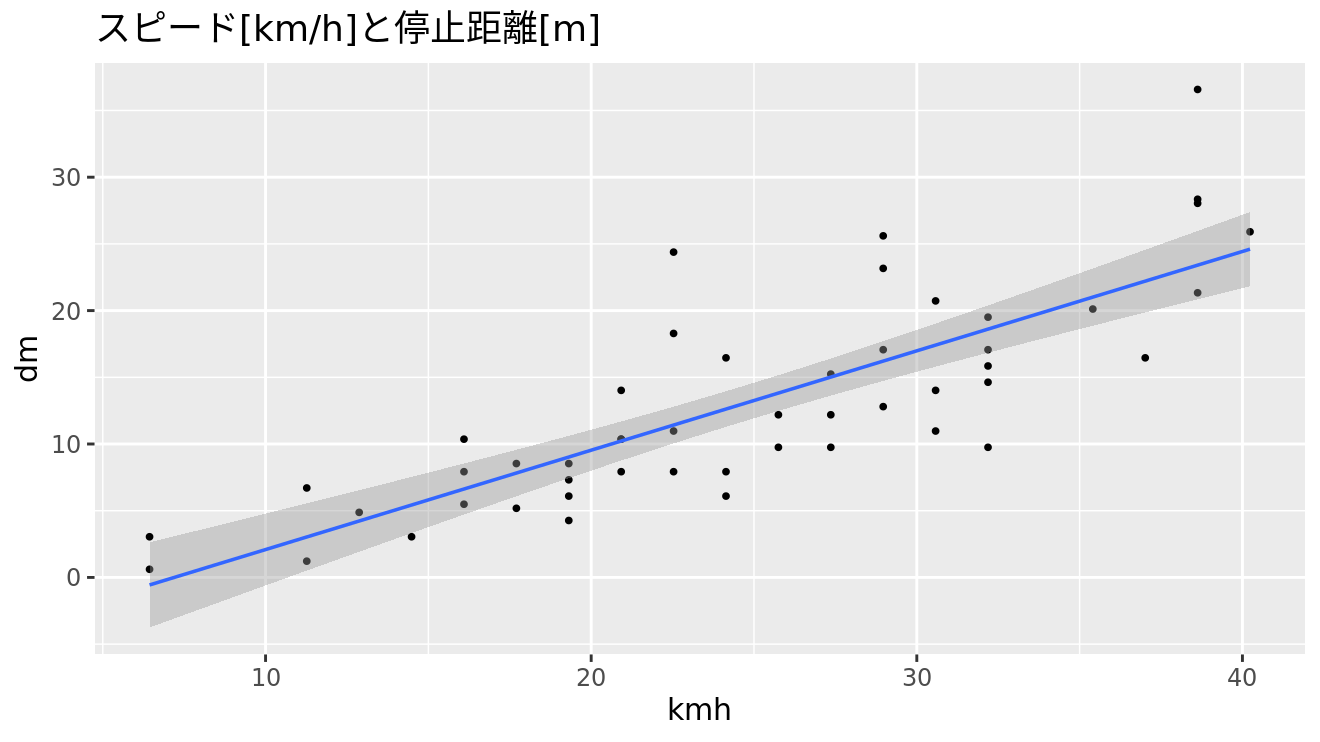

In [12]:
g1 + geom_smooth(method = "lm", formula = y ~ x)

新しい速度データを作り、予測計算をする。

In [13]:
newdata = data.frame(kmh = c(40,60,80,100))

In [14]:
newdata$dm = predict(lm1,newdata)

In [15]:
newdata

kmh,dm
<dbl>,<dbl>
40,24.43294
60,39.32847
80,54.22399
100,69.11952


よく言われているように、100km/hの速度だと停止するまでに60m以上かかる。